In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = "datasets/renewable_energy_dataset.csv"

In [5]:
df = pd.read_csv(dataset)
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

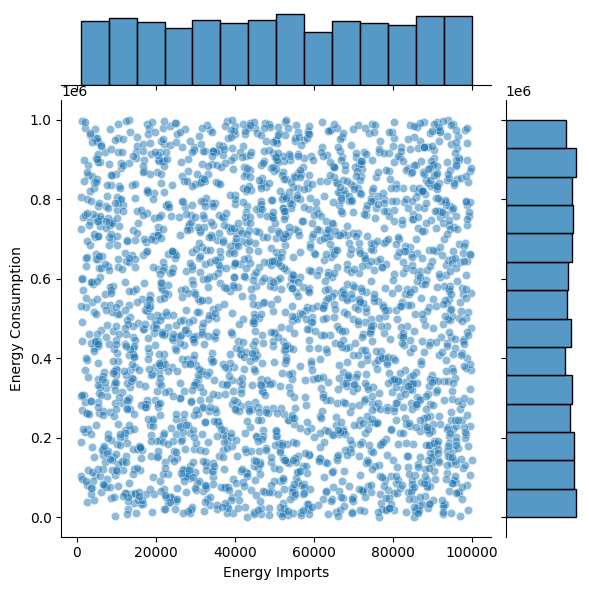

In [22]:
sns.jointplot(data=df, x="Energy Imports", y="Energy Consumption", alpha=0.5)

In [8]:
subset = df[["GDP", "Installed Capacity (MW)", "Energy Subsidies", "Energy Subsidies", "Number of Research Institutions"]]
subset = subset.loc[:, ~subset.columns.duplicated()]
subset.head()

,GDP,Installed Capacity (MW),Energy Subsidies,Number of Research Institutions
0,1.775278e+14,5549.794323,1.688208e+08,851
1,6.435372e+13,43211.593798,8.452255e+08,590
2,1.567926e+14,6139.117212,2.578337e+08,101
3,1.350464e+14,40323.639260,9.798269e+08,327
4,8.677956e+13,30755.403056,6.767606e+08,985


In [15]:
def normalise(df, col_name):
    min = df[col_name].min()
    max = df[col_name].max()
    
    for i in range(len(df[col_name])):
        normalised_value = (df[col_name][i] - min)/(max-min)
        df[col_name][i] = normalised_value
        
    return "succesfully normalaised"

In [ ]:
for column in subset.columns:
    if column != "GDP":
        normalise(subset, column)
# normalise(subset, "Installed Capacity (MW)")

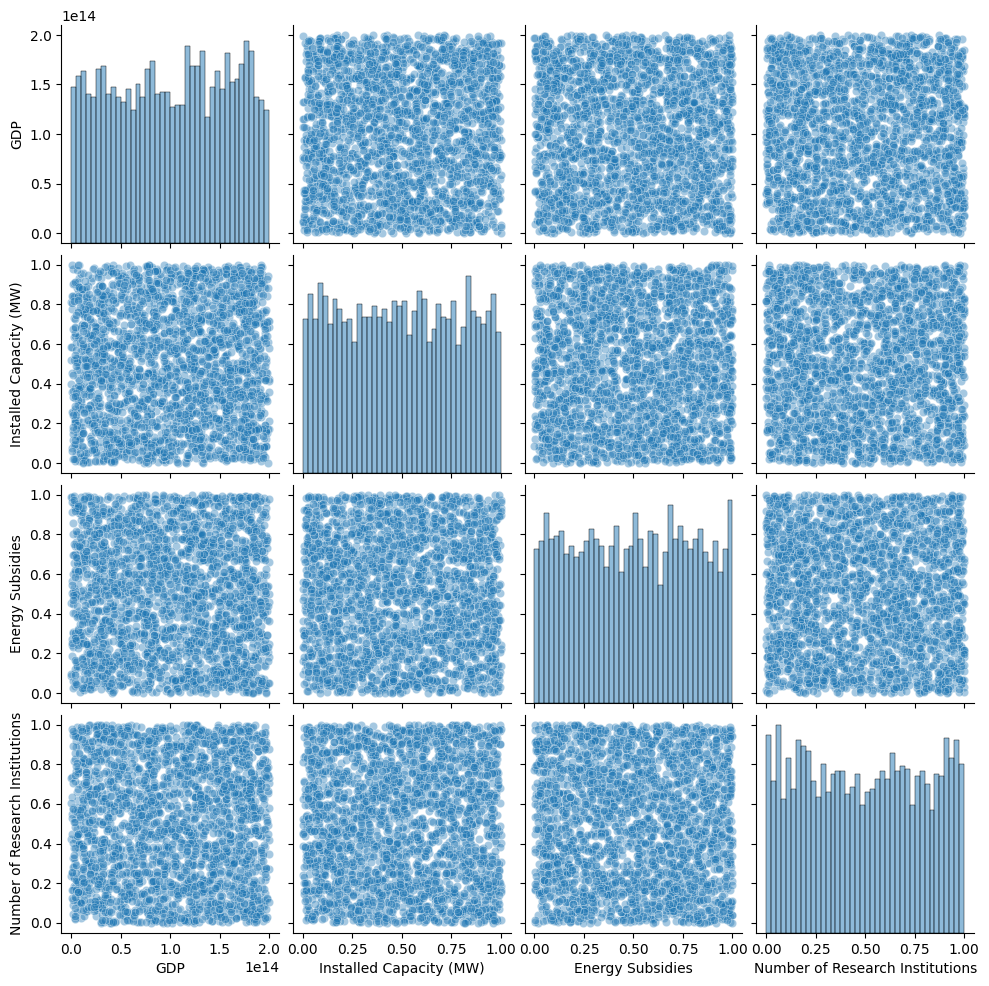

In [20]:
sns.pairplot(data=subset,
             kind="scatter",
             plot_kws={"alpha": 0.4},
             diag_kws={"alpha": 0.5, "bins": 40})

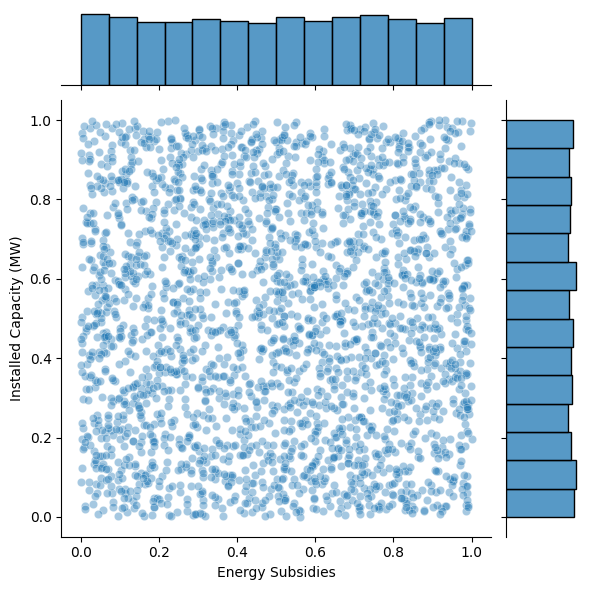

In [21]:
sns.jointplot(data=subset, x="Energy Subsidies", y="Installed Capacity (MW)", alpha=0.4)

there seems no relation, but i will check again